In [1]:
import sys
import os
sys.path.append(os.getcwd() + "\\..\\")

In [2]:
import model
import neural
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import json
import multiprocessing
import utils
import matplotlib.pyplot as plt
import main
%matplotlib inline

c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [3]:
!pip install --upgrade git+https://github.com/titu1994/tfdiffeq.git 

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/titu1994/tfdiffeq.git to c:\users\aleksey\appdata\local\temp\pip-req-build-cgzb0k2j
  Created wheel for tfdiffeq: filename=tfdiffeq-0.0.1-py2.py3-none-any.whl size=52668 sha256=4b3a647d8a700ea59262c8d5cce6b6f07971ce4805ca695c0cae8f9171b5fe7a
  Stored in directory: C:\Users\Aleksey\AppData\Local\Temp\pip-ephem-wheel-cache-9brithaa\wheels\39\f7\18\5249c8ee2e8306b27455aca27c3b64d272570ddb0323eefc04
Successfully built tfdiffeq


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 1.14.0 requires tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 2.1.1 which is incompatible.
tensorboard 2.1.1 requires grpcio>=1.24.3, but you'll have grpcio 1.18.0 which is incompatible.
tensorboard 2.1.1 requires setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.
You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


In [3]:
inputs = keras.layers.Input((2,))
output = neural.ODEBlock(64, 3, tf.nn.relu)

In [4]:
output.build((64,))

W0216 19:35:14.082281  9320 deprecation.py:506] From c:\program files\python37\lib\site-packages\tensorflow\python\keras\initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
x = keras.layers.Dense(64, "relu")(inputs)
o = output(x)

W0216 19:35:19.634232  9320 deprecation.py:506] From c:\program files\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0216 19:35:20.068542  9320 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0216 19:35:20.369756  9320 deprecation.py:323] From c:\program files\python37\lib\site-packages\tensorflow\contrib\integrate\python\ops\odes.py:233: div (from tensorflow.python.ops.math_ops) is d

In [6]:
o2 = keras.layers.Dense(2, "linear")(o)

In [7]:
m = tf.keras.Model(inputs=inputs, outputs=o2)

In [8]:
m.compile("Adam", loss="mse")

In [9]:
m.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                192       
_________________________________________________________________
ode_block (ODEBlock)         (None, 64)                8192      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 8,514
Trainable params: 8,514
Non-trainable params: 0
_________________________________________________________________


In [11]:
X, Y, X_test, Y_test, max_train, max_test = main.make_data()

In [12]:
h = m.fit(X, Y, batch_size=32, epochs=100, 
             validation_data = [X_test, Y_test])

Train on 30037 samples, validate on 29988 samples


W0216 19:35:41.751976  9320 deprecation.py:323] From c:\program files\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
30037/30037 [==============================] - 6s 216us/sample - loss: 4.6407e-04 - val_loss: 2.3063e-05
Epoch 2/100
30037/30037 [==============================] - 4s 128us/sample - loss: 4.0423e-06 - val_loss: 6.2767e-06
Epoch 3/100
30037/30037 [==============================] - 4s 128us/sample - loss: 3.2618e-06 - val_loss: 5.2056e-06
Epoch 4/100
30037/30037 [==============================] - 4s 129us/sample - loss: 2.5985e-06 - val_loss: 5.1027e-06
Epoch 5/100
30037/30037 [==============================] - 4s 128us/sample - loss: 2.5774e-06 - val_loss: 1.2900e-05
Epoch 6/100
30037/30037 [==============================] - 4s 128us/sample - loss: 2.9907e-06 - val_loss: 5.7692e-06
Epoch 7/100
30037/30037 [==============================] - 4s 129us/sample - loss: 2.1234e-06 - val_loss: 8.5858e-06
Epoch 8/100
30037/30037 [==============================] - 4s 130us/sample - loss: 2.6143e-06 - val_loss: 7.2197e-06
Epoch 9/100
30037/30037 [==============================] - 4s 12

30037/30037 [==============================] - 4s 127us/sample - loss: 4.8717e-07 - val_loss: 6.9668e-06
Epoch 71/100
30037/30037 [==============================] - 4s 128us/sample - loss: 4.1621e-07 - val_loss: 6.0813e-06
Epoch 72/100
30037/30037 [==============================] - 4s 128us/sample - loss: 2.7403e-07 - val_loss: 6.2188e-06
Epoch 73/100
30037/30037 [==============================] - 4s 128us/sample - loss: 4.4532e-07 - val_loss: 6.1793e-06
Epoch 74/100
30037/30037 [==============================] - 4s 128us/sample - loss: 4.0780e-07 - val_loss: 5.4338e-06
Epoch 75/100
30037/30037 [==============================] - 4s 128us/sample - loss: 2.3625e-07 - val_loss: 7.0269e-06
Epoch 76/100
30037/30037 [==============================] - 4s 127us/sample - loss: 3.5482e-07 - val_loss: 4.9023e-06
Epoch 77/100
30037/30037 [==============================] - 4s 128us/sample - loss: 4.6442e-07 - val_loss: 5.3582e-06
Epoch 78/100
30037/30037 [==============================] - 4s 128us/

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

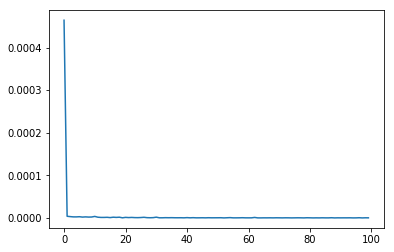

In [17]:
plt.plot([i for i in range(100)], h.history["loss"])
plt.set_ylim(0, 0.0001)

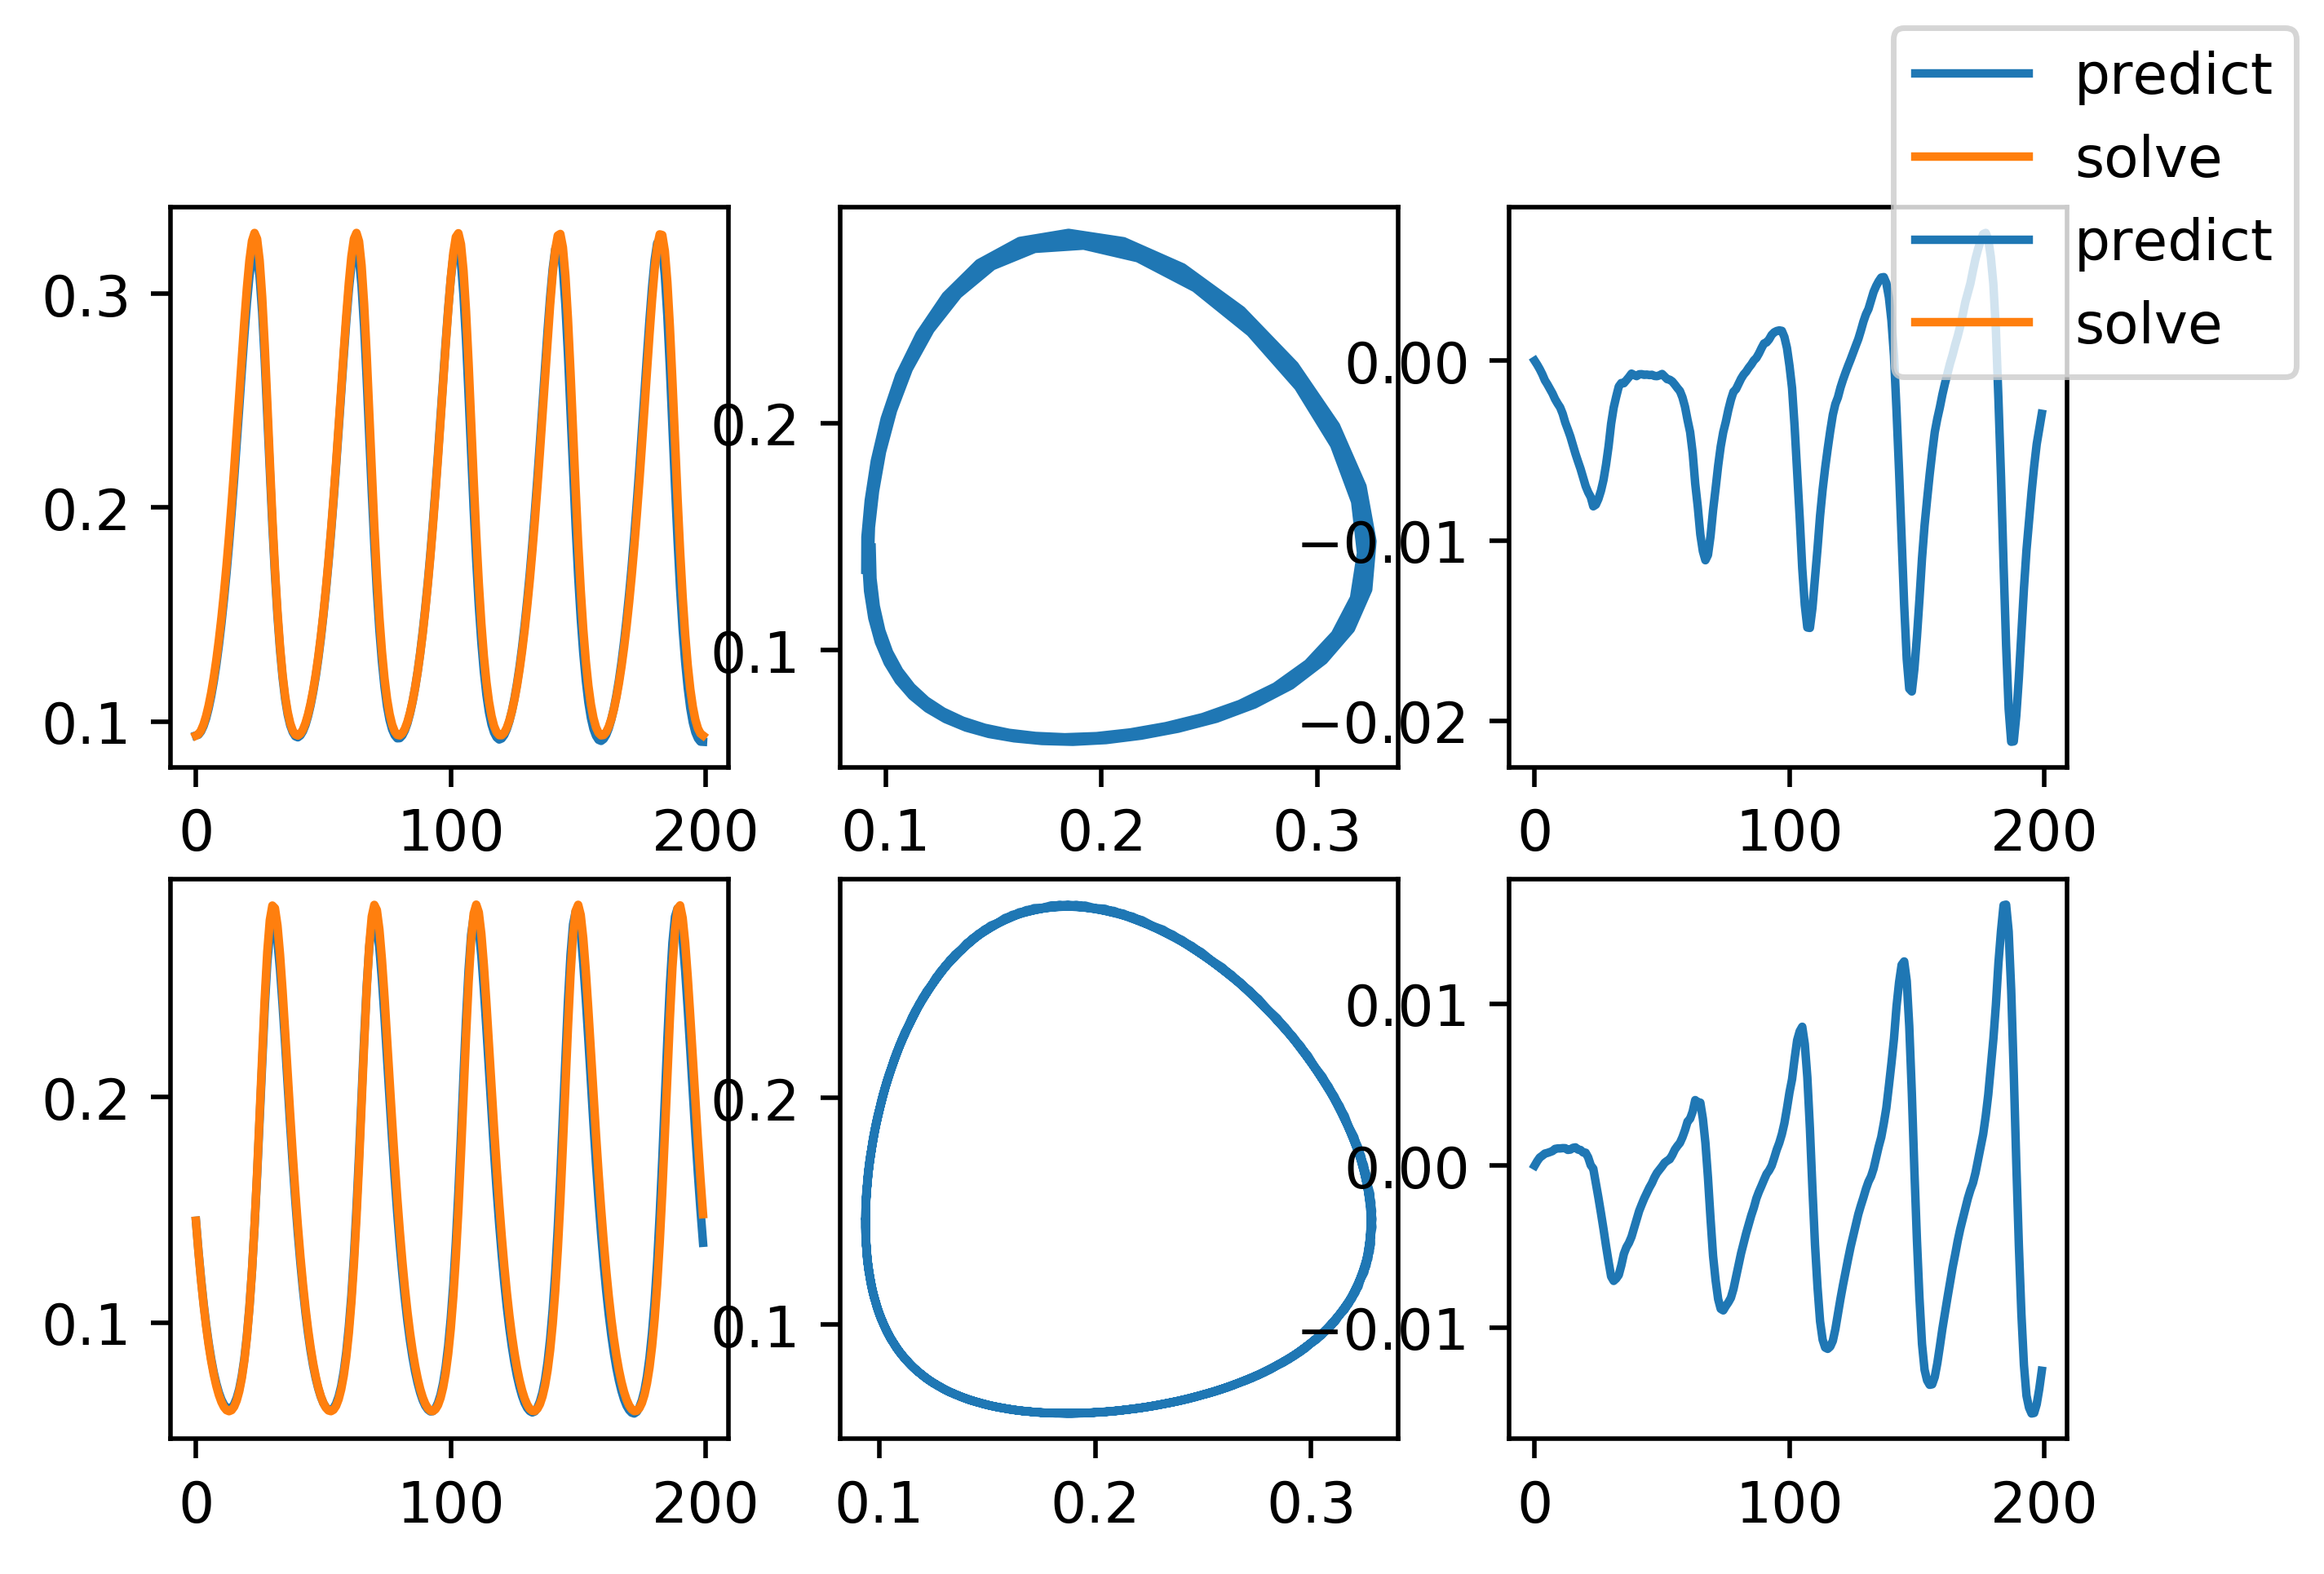

In [20]:
lotka_voltera = model.LotkaVoltera(2/3, 4/3, 1, 1, [])
model.model_predict_test(m, lotka_voltera, [0.5, 0.5], max_train, 200, 40)